<a href="https://colab.research.google.com/github/rahmani3101/Machine-Learning-/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Random Forest Classifier



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

1) DATAFRAME

In [ ]:
data = {
    "Hours":[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7],
    "Scores":[21,47,27,75,30,20,88,60,81,25,85],
    "Result":["Fail","Pass","Fail","Pass","Fail","Fail","Pass","Pass","Pass","Fail","Pass"]
}

In [ ]:
df = pd.DataFrame(data)
df["Result"] = df["Result"].map({"Fail":0,"Pass":1}) # convert to 0-1
display(df)

,Hours,Scores,Result
0,2.5,21,0
1,5.1,47,1
2,3.2,27,0
3,8.5,75,1
4,3.5,30,0
5,1.5,20,0
6,9.2,88,1
7,5.5,60,1
8,8.3,81,1
9,2.7,25,0


In [ ]:
X = df[["Hours","Scores"]]
y = df["Result"]

2) VISUALIZE (Pass vs Fail)

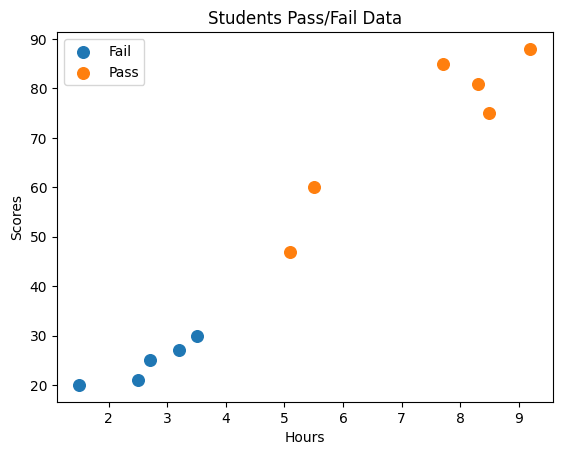

In [ ]:
plt.scatter(df[df.Result==0]["Hours"],df[df.Result==0]["Scores"],label="Fail",s=70)
plt.scatter(df[df.Result==1]["Hours"],df[df.Result==1]["Scores"],label="Pass",s=70)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Students Pass/Fail Data")
plt.legend()
plt.show()

3) TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

# 5) Predict results


In [ ]:
y_pred = rf.predict(X_test)

6) Evaluation

In [ ]:
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Random Forest Accuracy: 1.0

Confusion Matrix:
 [[3 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



7) Decision region plot (grid)

In [ ]:
x_min, x_max = X["Hours"].min()-1, X["Hours"].max()+1
y_min, y_max = X["Scores"].min()-10, X["Scores"].max()+10

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.1),
                     np.arange(y_min, y_max,1))

In [ ]:
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


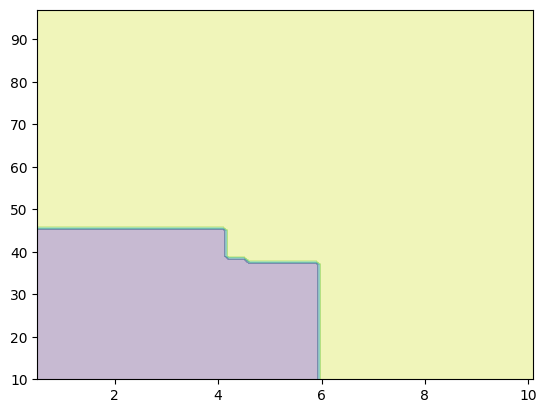

In [ ]:
plt.contourf(xx,yy,Z,alpha=0.3)

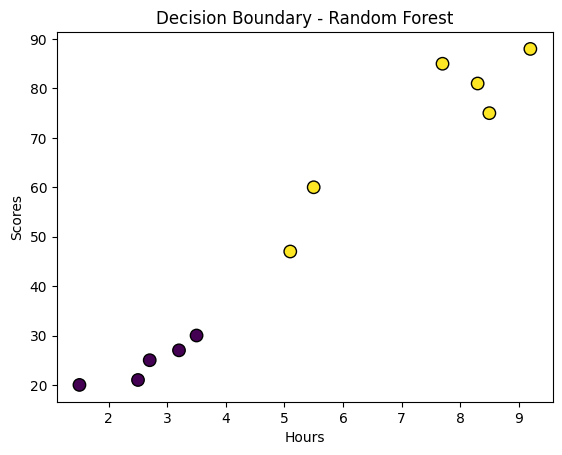

In [ ]:
plt.scatter(X["Hours"],X["Scores"],c=y,s=80,edgecolor="k")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Decision Boundary - Random Forest")
plt.show()

8) Predict new student

In [ ]:
new = np.array([[9.25,85]])
p = rf.predict(new)
print("Prediction for student(9.25 hr,85 score) =", "Pass" if p[0]==1 else "Fail")

Prediction for student(9.25 hr,85 score) = Pass


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


9) Compare with Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
print("\nDecision Tree Accuracy:",accuracy_score(y_test,y_pred_dt))


Decision Tree Accuracy: 1.0
